In [3]:
import pandas as pd

data=pd.read_csv("jobs_data.csv")
data.head(5)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


divide data into inputs and targets !

In [9]:
input=data.drop("salary_more_then_100k",axis=1)
input.head(5)

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [12]:
targets=data["salary_more_then_100k"]
targets.head(5)

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

we convert categorical data into numerical using label encoding 

In [14]:
from sklearn.preprocessing import LabelEncoder

le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [15]:
input["n_company"]=le_company.fit_transform(input["company"])
input["n_job"]=le_job.fit_transform(input["job"])
input["n_degree"]=le_degree.fit_transform(input["degree"])

In [16]:
input.head(5)

,company,job,degree,n_company,n_job,n_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [20]:
inputs=input.drop(input[["company","job", "degree"]],axis=1)

In [21]:
inputs

,n_company,n_job,n_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [23]:
from sklearn import tree

model=DecisionTreeClassifier()
model.fit(inputs,targets)

DecisionTreeClassifier()

In [34]:
model.score(inputs,targets)

1.0

In [25]:
model.predict([[2 ,2 ,0]])


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

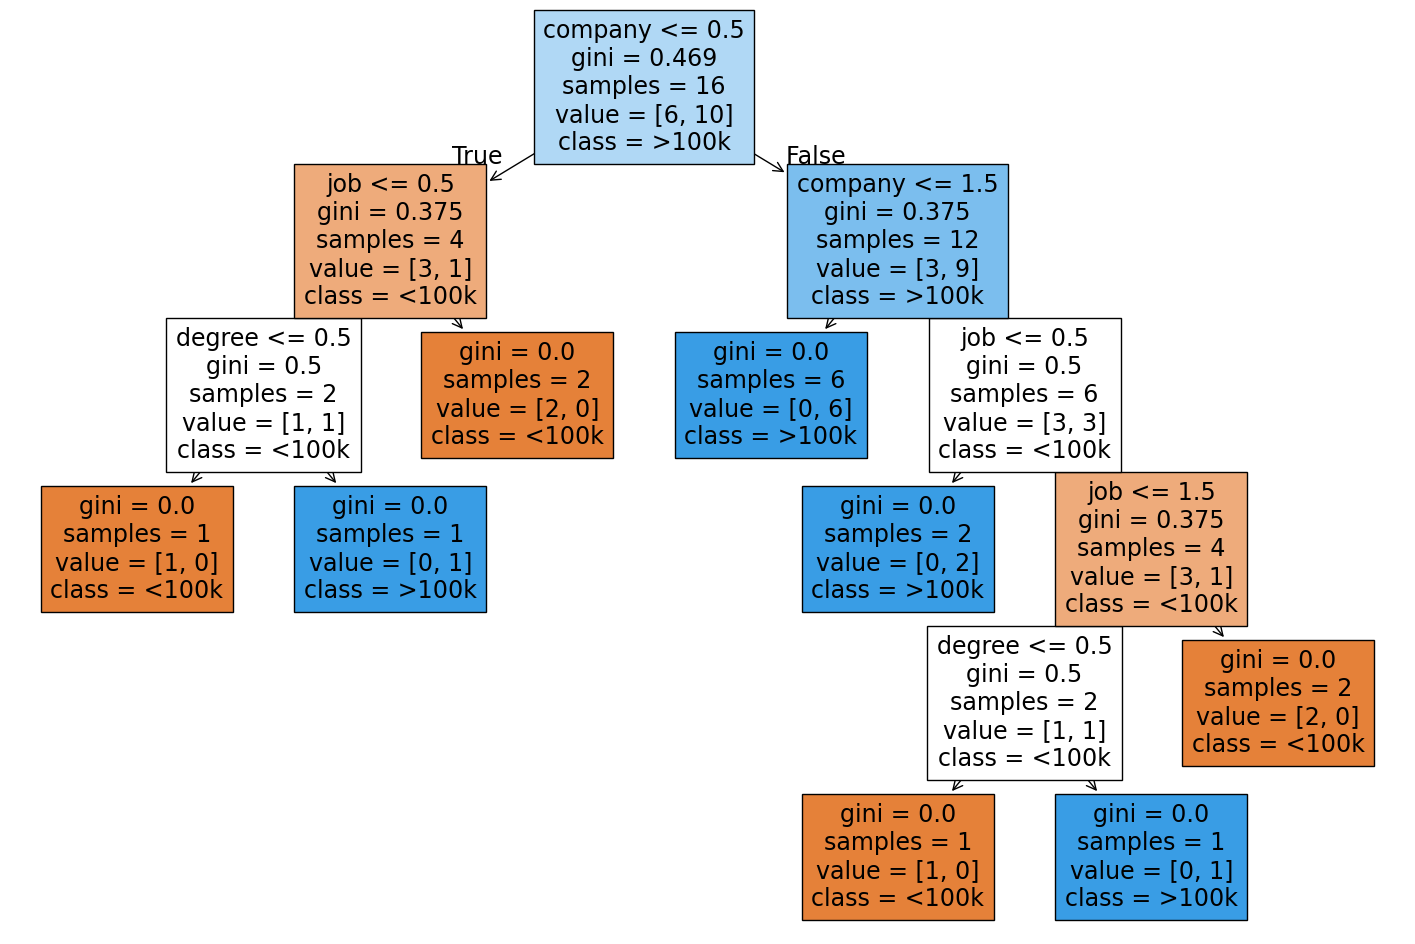

In [31]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,12))
tree.plot_tree(model,feature_names=["company","job","degree"],class_names=['<100k','>100k'],filled=True)
plt.show()